# API (Application Programming Interface)

Q. What is an API?

API is a set of definitions and protocols for integrating and interacting with application software.

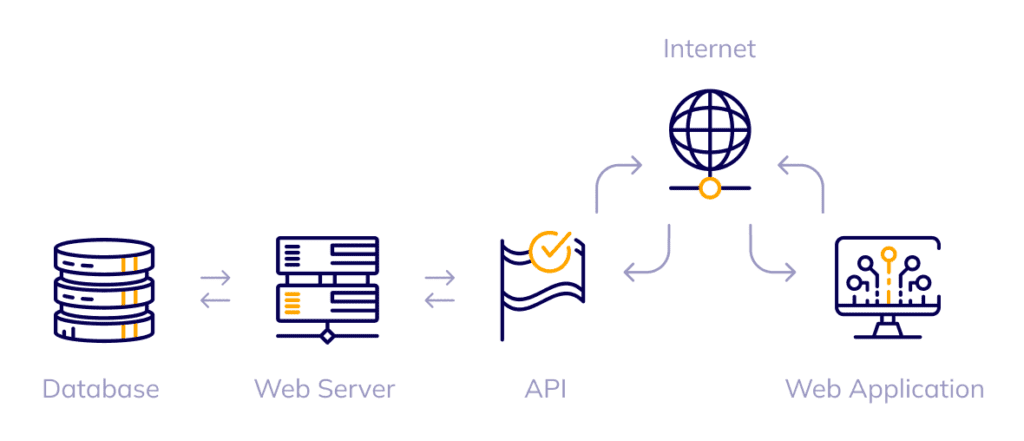

Q. Types of APIs:

* Web APIs: These are APIs that use web protocols such as HTTP/HTTPS. They are commonly used to enable communication between web services and applications.
* Library APIs: These are APIs provided by programming libraries to enable developers to use pre-built functions and modules in their applications.
* Operating System APIs: These APIs provide a set of functions for the interaction between applications and the operating system.

Q. RESTful APIs:

* REST, or Representational State Transfer, is an architectural style for designing networked applications.
* RESTful APIs are designed based on REST principles. They use standard HTTP methods (`GET, POST, PUT, DELETE`) to perform operations on resources identified by URLs.

Q. Understanding Status Codes
* `200`: Everything went okay, and the server returned a result (if any).
* `301`: The server is redirecting you to a different endpoint. (This can happen when a company switches domain names, or when an endpoint's name has changed ).
* `400`: The server thinks you made a bad request. (This can happen when you don't send the information that the API requires to process your request ).
* `401`: The server thinks you're not authenticated. (This happens when you don't send the right credentials to access an API ).
* `403`: The resource you're trying to access is forbidden, and you don't have the right permissions to see it.
* `404`: The server didn't find the resource you tried to access.

Q. Examples of API Usage:

* Social media platforms often provide APIs for developers to integrate their apps with platform features.
* Weather APIs, like the OpenWeatherMap API in your previous code, allow developers to access weather data for different locations.
* Payment gateways provide APIs for processing transactions.



In [2]:
import pandas as pd
import requests
from configparser import ConfigParser


API used in this Project:

* Weather API: https://openweathermap.org/api
* JSON Viewer: https://jsonviewer.stack.hu/

In [18]:
# Extract key from the
# configuration file
api_url = "https://api.openweathermap.org/data/2.5/weather?q={}&appid={}"
api_file = "weather.key"
config = ConfigParser()
config.read(api_file)
api_key = config['api_key']['key']

In [21]:
# Function to get weather details from OpenWeatherMap API
def get_weather(city):
    res = requests.get(api_url.format(city, api_key))
    
    if res:
        json_data = res.json()
        city = json_data['name']
        country_name = json_data['sys']['country']
        temp_kelvin = json_data['main']['temp']
        temp_celsius = temp_kelvin - 273.15
        temp_fahrenheit = (temp_kelvin) * 1.8 + 32
        weather_description = json_data['weather'][0]['main']
        wind_description = json_data['wind']['speed']
        pressure_description = json_data['main']['pressure']
        humidity_description = json_data['main']['humidity']
        
        # Create a dictionary with weather details
        weather_dict = {
            'City': city,
            'Country': country_name,
            'Temperature (Celsius)': temp_celsius,
            'Temperature (Fahrenheit)': temp_fahrenheit,
            'Weather Description': weather_description,
            'Wind Speed': wind_description,
            'Pressure': pressure_description,
            'Humidity': humidity_description,
        }

        return weather_dict
    
    else:
        print(f"Error - No Forecast Found for {city}, Try Again!!!")



In [22]:
# List of cities for which you want weather details
cities = [
    "Tokyo",
    "Delhi",
    "Shanghai",
    "Sao Paulo",
    "Mumbai",
    "Mexico City",
    "Beijing",
    "Osaka",
    "Cairo",
    "New York City",
    "Dhaka",
    "Karachi",
    "Chongqing",
    "Istanbul",
    "Kolkata",
    "Lahore",
    "Manila",
    "Lima",
    "Tehran",
    "Bangkok",
    "Kinshasa",
    "Bogotá",
    "London",
    "Lagos",
    "Lima",
    "Bangalore",
    "Bangkok",
    "Chennai",
    "Hyderabad",
    "Paris"
]


In [23]:
# Create an empty list to store weather details for each city
weather_data_list = []

# Loop through each city and fetch weather details
for city_name in cities:
    weather_data = get_weather(city_name)
    weather_data_list.append(weather_data)

# Create a Pandas DataFrame from the list of dictionaries
weather_df = pd.DataFrame(weather_data_list)

# Print the resulting DataFrame
weather_df

,City,Country,Temperature (Celsius),Temperature (Fahrenheit),Weather Description,Wind Speed,Pressure,Humidity
0,Tokyo,JP,8.68,539.294,Clear,2.06,1027,59
1,Delhi,IN,15.05,550.760,Mist,2.06,1015,82
2,Shanghai,CN,9.63,541.004,Mist,1.00,1023,96
3,São Paulo,BR,27.06,572.378,Clear,3.60,1018,54
4,Mumbai,IN,27.99,574.052,Smoke,4.12,1012,44
5,Mexico City,MX,10.73,542.984,Clouds,0.00,1027,46
6,Beijing,CN,-4.06,516.362,Clear,1.22,1025,62
7,Osaka,JP,6.68,535.694,Clear,2.06,1028,54
8,Cairo,EG,16.42,553.226,Clouds,7.72,1020,39
9,New York,US,1.43,526.244,Clouds,3.60,1024,67


In [25]:
# Saving the weather data into csv file for future use.
weather_df.to_csv("weather_data.csv")

Note: Steps to create the Configuration file:

* Create a text file named "waether_key"on your jupyter notebook.
* Write key name enclosed in closed brackets in it as [api].
* Create a variable key here I used was "key" and paste the key you copied from the Open Weather Map website.